# Logic of Preference over LTL Specifications

This example demonstrates how to
* define a PrefLTL formula (syntax)
* visualize the preference model induced by PrefLTL formula.


**Syntax**:
PrefLTL formulas are defined over LTL formulas, whereas PrefScLTL formulas restrict the LTL formulas to be
"guarantee" formulas only (see Manna Pnueli Hierarchy).

Here we will focus on PrefScLTL formulas.

PrefScLTL formulas:
* atoms: Any string acceptable by `/[a-z][A-Za-z0-9_]/`.
* propositional operators:
    - `!` Negation
    - `&` And
    - `|` Or
* temporal operators:
    - `F` Eventually
    - `U` Until
    - `G` Always
* preference operators:
    - `>=` weak preference
    - `>` strict preference
    - `~` indifference
    - `<>` incomparable
    - `&&` generalized-And.
    - `||` generalized-Or.  (Note: current model doesn't support Or-ing of preference formulas).


In [2]:
import os
import sys

sys.path.append("/home/ggsolver")
from ggsolver.logic.prefltl import PrefScLTL, ParsingError

ERROR:root:[ERROR] logic.pl could not be loaded. Logic functionality will not work. 
Error: cannot import name 'Automaton' from partially initialized module 'ggsolver.models' (most likely due to a circular import) (/home/ggsolver/ggsolver/models.py)


## Default construction of PrefScLTL formulas.


In [3]:
f0 = PrefScLTL("Fa >= Fb")
f1 = PrefScLTL("Fb > a U Fb")

print(f0)
print(f1)

Fa >= Fb
Fb > a U Fb


If input LTL formulas are not guarantee formulas, a ParsingError will be raised.

In [4]:
try:
    f2 = PrefScLTL("Fa > Gb")
except ParsingError as err:
    print(f"ParsingError: {err}")

ParsingError: Given formula: Gb is not an ScLTL formula.


## Basic properties of PrefScLTL formula

An instance of PrefScLTL automatically collects all atoms and outcomes (i.e. LTL formulas) appearing in it.
It also generates a preference model.

In [5]:
f = PrefScLTL("Fa >= Fb")
print(f"{f.atoms()=}")
print(f"{f.outcomes()=}")
print(f"{f.model()=}")

f.atoms()={'a', 'b'}
f.outcomes()=[LTL((! Fb) & (!Fa )), LTL( Fb), LTL(Fa )]
f.model()=<ggsolver.logic.prefltl.PrefModel object at 0x7fc8592e6e20>


The preference model is a PrefModel object, which represents the following tuple
$$P = \langle U, \succeq\rangle$$

In addition, it also stores the same set of atoms as PrefScLTL formula.

In [6]:
model = f.model()

print(f"{model.outcomes()=}")
print(f"{model.relation()=}")
print(f"{model.atoms()=}")

model.outcomes()=[LTL((! Fb) & (!Fa )), LTL( Fb), LTL(Fa )]
model.relation()={(2, 1), (0, 0), (1, 1), (2, 0), (2, 2), (1, 0)}
model.atoms()={'a', 'b'}


We note two facts regarding outcomes and relation.

1. The set of outcomes is complete. That is, the formula `LTL((! Fb) & (!Fa ))` which is not in formula is added.
2. The relation contains tuples `(i, j)` representing that `outcomes[i]` is weakly preferred to `outcomes[j]`. The relation is reflexive and transitive. By default, satisfying some outcome is assumed to be strictly preferred to satisfying none of the outcomes in formula.

The following code prints the preference relations as formulas.


In [7]:
for out1, out2 in model.relation():
    print(f"{model.index2outcome(out1)} >= {model.index2outcome(out2)}")

Fa  >=  Fb
(! Fb) & (!Fa ) >= (! Fb) & (!Fa )
 Fb >=  Fb
Fa  >= (! Fb) & (!Fa )
Fa  >= Fa 
 Fb >= (! Fb) & (!Fa )


The model can also be visualized as a graph.

In [8]:
img_path = os.path.join("home", "ggsolver", "examples", "notebooks", "logic", "out")

In [9]:
graph = model.graphify()
graph.to_png(os.path.join(img_path, "graph.png"), nlabel=["state"])

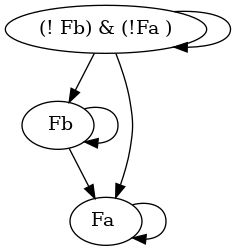

In [10]:
from IPython.display import Image
Image(filename=os.path.join(img_path, "graph.png"))

## Construction Parameters

PrefScLTL Constructor takes two optional parameters.

1. `atoms: set(str)` which allows users to specify atoms that do not appear in PrefScLTL formula.
2. `null_assumption: bool` which allows users to specify if satisfying some outcome should be considered to be strictly preferred to satisfying none of them.

We illustrate each parameter separately.

In [11]:
f = PrefScLTL("Fa > Fb", atoms={'c'})
f.atoms()

{'a', 'b', 'c'}

As seen in above example, the user provided atoms are added to set of atoms collected from given formula.

Next, we show a model generated with and without the null assumption.

In [12]:
f1 = PrefScLTL("Fa > Fb", null_assumption=False)
f2 = PrefScLTL("Fa > Fb", null_assumption=True)

model1 = f1.model()
model2 = f2.model()

print(f"{model1.relation()=}")
print(f"{model2.relation()=}")

model1.relation()={(2, 1), (0, 0), (1, 1), (2, 2)}
model2.relation()={(2, 1), (0, 0), (1, 1), (2, 0), (2, 2), (1, 0)}


As we can see, model1 does not contain preferences `(1, 0), (2, 0)`.